<a href="https://colab.research.google.com/github/meghna-panda/task1/blob/main/data_preprocessing_and_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

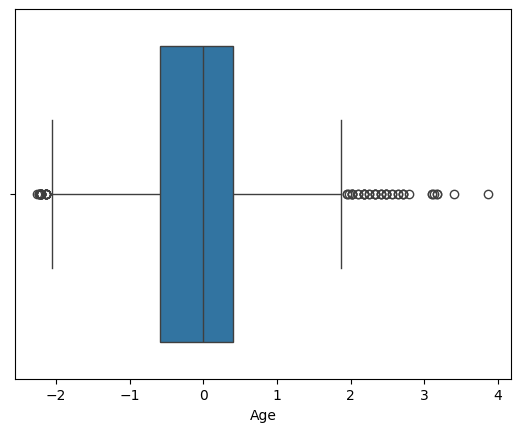

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset (assuming it's uploaded to /content)
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Check info and missing values
print(df.info())
print(df.isnull().sum())

# Fill missing values for numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# One-hot encoding categorical columns
df = pd.get_dummies(df, drop_first=True)

# Scale a numerical column (e.g., 'Age')
scaler = StandardScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])

# Plot boxplot for scaled 'Age' column
sns.boxplot(x=df['Age'])
plt.show()

# Save cleaned data to CSV
df.to_csv('/content/cleaned_data.csv', index=False)

# Optionally, download the cleaned data file
from google.colab import files
files.download('/content/cleaned_data.csv')


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

# Load the dataset into a DataFrame
df = pd.read_csv('/content/Titanic-Dataset.csv')

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [6]:
# Display the first few rows of the dataset
print(df.head())

# Check for null values and data types
print(df.info())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [8]:
# Fill missing values for numerical columns with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# For categorical columns, fill with the mode (most frequent value)
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


<ipython-input-8-2d436d1bd935>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [9]:
numeric_columns = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']


In [10]:
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)  # drop_first to avoid dummy variable trap

In [11]:
from sklearn.preprocessing import StandardScaler

# Standardizing the numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

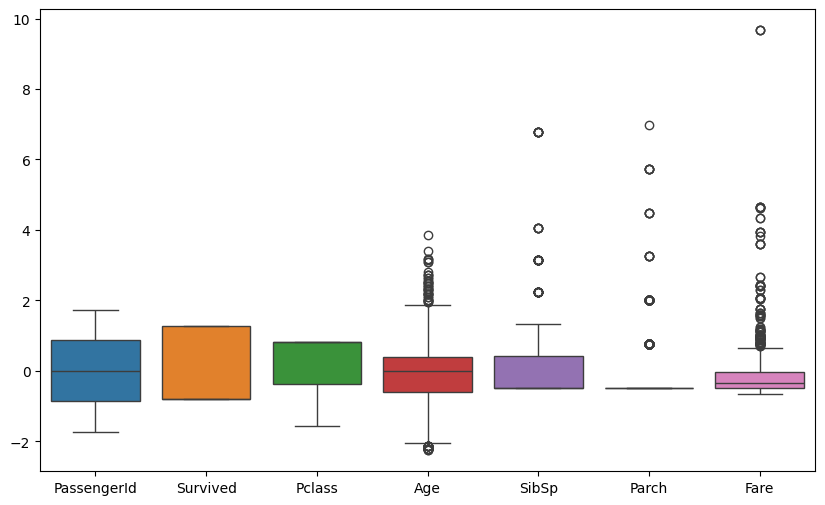

In [12]:
# Visualizing outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.show()

In [13]:
# Example: Removing outliers using IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)